<a href="https://colab.research.google.com/github/hsbidkar/StackOverflowEDA/blob/main/MNIST_NUMPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pickle
import gzip
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import sklearn
import sklearn.datasets
import scipy
from PIL import Image
from scipy import ndimage
%matplotlib inline

In [3]:
# Load the data:
def load_data():
    f = gzip.open('mnist.pkl.gz', 'rb')
    f.seek(0)
    training_data, validation_data, test_data = pickle.load(f,encoding='latin1')
    f.close()
    return (training_data, validation_data, test_data)

In [11]:
# Load the data into training_data, validation_data and test_data arrays:
training_data, validation_data, test_data = load_data()
training_data

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([5, 0, 4, ..., 8, 4, 8]))

In [12]:
# Check the shape of data:
print(training_data[0].shape)
print(training_data[1].shape)

# Take a look at the feature and target dataset:
print("The feature dataset is:" + "\n" + str(training_data[0]))
print("\nThe target dataset is:" + "\n" + str(training_data[1]))
 
# Take a look at the length of training data:
print("\nThe number of examples in the training dataset is:" + str(len(training_data[0])))
 
# Take a look at number of datapoints in each input:
print("\nThe number of points in a single input is:" + str(len(training_data[0][1])))

(50000, 784)
(50000,)
The feature dataset is:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

The target dataset is:
[5 0 4 ... 8 4 8]

The number of examples in the training dataset is:50000

The number of points in a single input is:784


In [13]:
def one_hot(j):
# input is the target dataset of shape (m,) where m is the number of data points
# returns a 2 dimensional array of shape (10, m) where each target value is converted to a one hot encoding
    n = j.shape[0]
    new_array = np.zeros((10, n))
    index = 0
    for res in j:
        new_array[res][index] = 1.0
        index = index + 1
    return new_array
 
data = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(data.shape)
one_hot(data)

(10,)


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [14]:
def data_wrapper():
    tr_d, va_d, te_d = load_data()
    
# Training data:
    training_inputs = np.array(tr_d[0][:]).T
    training_results = np.array(tr_d[1][:])
    train_set_y = one_hot(training_results)
    
# Validation data:
    validation_inputs = np.array(va_d[0][:]).T
    validation_results = np.array(va_d[1][:])
    validation_set_y = one_hot(validation_results)
    
# Test data:
    test_inputs = np.array(te_d[0][:]).T
    test_results = np.array(te_d[1][:])
    test_set_y = one_hot(test_results)
    
    return (training_inputs, train_set_y, test_inputs, test_set_y)

train_set_x, train_set_y, test_set_x, test_set_y = data_wrapper()

In [15]:
# Print shapes of the encoded data:
print ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x shape: (784, 50000)
train_set_y shape: (10, 50000)
test_set_x shape: (784, 10000)
test_set_y shape: (10, 10000)


In [16]:
# Convert the encoded data to a dataframe and visualise it:
y = pd.DataFrame(train_set_y)
print("The target dataset is:" + str(training_data[1]))
print("The one hot encoding dataset is:")
y

The target dataset is:[5 0 4 ... 8 4 8]
The one hot encoding dataset is:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,49960,49961,49962,49963,49964,49965,49966,49967,49968,49969,49970,49971,49972,49973,49974,49975,49976,49977,49978,49979,49980,49981,49982,49983,49984,49985,49986,49987,49988,49989,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


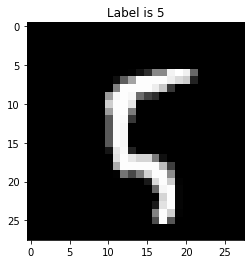

In [18]:
# Visualise a certain image from the training set:
index  = 100
k = train_set_x[:,index]
k = k.reshape((28, 28))
plt.title('Label is {label}'.format(label= training_data[1][index]))
plt.imshow(k, cmap='gray')

In [24]:
def sigmoid(Z):   
# Z is NumPy array of shape (n, m) where n is the number of neurons in the layer and m is the number of samples
    H = 1/(1+np.exp(-Z))
    sigmoid_memory = Z

# sigmoid_memory is stored as it is used later on in backpropagation 
    return H, sigmoid_memory

In [26]:
Z = np.arange(-8,8).reshape(8,2)
print("sigmoid(Z) = \n" + str(sigmoid(Z)))

sigmoid(Z) = 
(array([[3.35350130e-04, 9.11051194e-04],
       [2.47262316e-03, 6.69285092e-03],
       [1.79862100e-02, 4.74258732e-02],
       [1.19202922e-01, 2.68941421e-01],
       [5.00000000e-01, 7.31058579e-01],
       [8.80797078e-01, 9.52574127e-01],
       [9.82013790e-01, 9.93307149e-01],
       [9.97527377e-01, 9.99088949e-01]]), array([[-8, -7],
       [-6, -5],
       [-4, -3],
       [-2, -1],
       [ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7]]))


In [31]:
def relu(Z):
# Z is NumPy array of shape (n, m) where n is the number of neurons in the layer and m is the number of samples 
    H = np.maximum(0,Z)
    
    assert(H.shape == Z.shape)
    
    relu_memory = Z 

# relu_memory is stored as it is used later on in backpropagation
    return H, relu_memory

In [35]:
Z = np.array([1, 3, -1, -4, -5, 7, 9, 18]).reshape(4,2)
print ("relu(Z) = " + str(relu(Z)))

relu(Z) = (array([[ 1,  3],
       [ 0,  0],
       [ 0,  7],
       [ 9, 18]]), array([[ 1,  3],
       [-1, -4],
       [-5,  7],
       [ 9, 18]]))


In [37]:
def softmax(Z):
# Z is NumPy array of shape (n, m) where n is the number of neurons in the layer and m is the number of samples 
    Z_exp = np.exp(Z)
 
    Z_sum = np.sum(Z_exp,axis = 0, keepdims = True)
    
    H = Z_exp/Z_sum  #normalising step
    softmax_memory = Z

# softmax_memory is stored as it is used later on in backpropagation
    return H, softmax_memory

In [38]:
Z = np.array(np.arange(30)).reshape(10,3)
H, softmax_memory = softmax(Z)
print(H)

print(softmax_memory)

[[1.78595259e-12 1.78595259e-12 1.78595259e-12]
 [3.58718166e-11 3.58718166e-11 3.58718166e-11]
 [7.20504697e-10 7.20504697e-10 7.20504697e-10]
 [1.44717237e-08 1.44717237e-08 1.44717237e-08]
 [2.90672341e-07 2.90672341e-07 2.90672341e-07]
 [5.83831003e-06 5.83831003e-06 5.83831003e-06]
 [1.17265592e-04 1.17265592e-04 1.17265592e-04]
 [2.35534237e-03 2.35534237e-03 2.35534237e-03]
 [4.73083162e-02 4.73083162e-02 4.73083162e-02]
 [9.50212932e-01 9.50212932e-01 9.50212932e-01]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]
 [18 19 20]
 [21 22 23]
 [24 25 26]
 [27 28 29]]


In [42]:
def initialize_parameters(dimensions):
# dimensions is a list containing the number of neuron in each layer in the network
# It returns parameters which is a python dictionary containing the parameters "W1", "b1", ..., "WL", "bL":
    np.random.seed(7)
    parameters = {}
    L = len(dimensions)            # number of layers in the network + 1
 
    for l in range(1, L): 
        parameters['W'+str(l)]=np.random.randn(dimensions[l],dimensions[l-1])*0.1
        parameters['b' + str(l)]=np.zeros((dimensions[l], 1)) 
        
        assert(parameters['W' + str(l)].shape==(dimensions[l],dimensions[l-1]))
        assert(parameters['b' + str(l)].shape == (dimensions[l], 1))
        
    return parameters

In [40]:
# Declare the dimensions:
dimensions  = [784, 3, 7, 10]
 
# Run the initialize_parameters() function:
parameters = initialize_parameters(dimensions)
 
# Print the resultant weights and biases:
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.04167578 -0.00562668 -0.21361961 ... -0.06168445  0.03213358
  -0.09464469]
 [-0.05301394 -0.1259207   0.16775441 ... -0.03284246 -0.05623108
   0.01179136]
 [ 0.07386378 -0.15872956  0.01532001 ... -0.08428557  0.10040469
   0.00545832]]
b1 = [[0.]
 [0.]
 [0.]]
W2 = [[ 0.06650944 -0.19626047  0.2112715 ]
 [-0.28074571 -0.13967752  0.02641189]
 [ 0.10925169  0.06646016  0.08565535]
 [-0.11058228  0.03715795  0.13440124]
 [-0.16421272 -0.1153127   0.02013163]
 [ 0.13985659  0.07228733 -0.10717236]
 [-0.05673344 -0.03663499 -0.15460347]]
b2 = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [43]:
def layer_forward(H_prev, W, b, activation = 'relu'):
 
# H_prev is of shape (size of previous layer, number of examples)
# W is weights matrix of shape (size of current layer, size of the previous layer)
# b is bias vector of shape (size of the current layer, 1)
# activation is the activation to be used for forward propagation: "softmax", "relu", "sigmoid".
    
    if activation == "sigmoid":
        Z = np.dot(W, H_prev) + b 
        linear_memory = (H_prev, W, b)
        H , activation_memory = sigmoid(Z)
 
    elif activation == "softmax":
        Z = np.dot(W, H_prev) + b 
        linear_memory = (H_prev, W, b)
        H, activation_memory = softmax(Z)
    
    elif activation == "relu":
        Z = np.dot(W, H_prev) + b
        linear_memory = (H_prev, W, b)
        H, activation_memory = relu(Z)
 
# H is the output of the activation function 
# memory is a python dictionary containing "linear_memory" and "activation_memory"
        
    assert (H.shape == (W.shape[0], H_prev.shape[1]))
    memory = (linear_memory, activation_memory)
 
    return H, memory

In [44]:
# l-1 has two neurons, l has three, m = 5
# H_prev is (l-1, m)
# W is (l, l-1)
# b is (l, 1)
# H should be (l, m)
H_prev = np.array([[1,0, 5, 10, 2], [2, 5, 3, 10, 2]])
W_sample = np.array([[10, 5], [2, 0], [1, 0]])
b_sample = np.array([10, 5, 0]).reshape((3, 1))
 
H = layer_forward(H_prev, W_sample, b_sample, activation="sigmoid")[0]
H

array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.99908895, 0.99330715, 0.99999969, 1.        , 0.99987661],
       [0.73105858, 0.5       , 0.99330715, 0.9999546 , 0.88079708]])

In [45]:
def L_layer_forward(X, parameters):
# X is input data of shape (input size, number of examples)
# parameters is output of initialize_parameters()
 
# memories is the list of memory containing(for a relu activation, for example):
# - every memory of relu forward (there are L-1 of them, indexed from 1 to L-1), 
# - the memory of softmax forward (there is one, indexed L) 
 
    memories = []
    H = X
    L = len(parameters) // 2        # number of layers in the neural network
    
# Implement relu layer (L-1) times as the Lth layer is the softmax layer
    for l in range(1, L):
        H_prev = H 
        
        H, memory = layer_forward(H_prev, 
                                 parameters["W" + str(l)], 
                                 parameters["b" + str(l)], 
                                 activation='relu')
        memories.append(memory)
    
    # Implement the final softmax layer
    # HL here is the final prediction P as specified in the lectures
    HL, memory = layer_forward(H,
                              parameters["W" + str(L)], 
                              parameters["b" + str(L)], 
                              activation='softmax')
    memories.append(memory)
 
    assert(HL.shape == (10, X.shape[1]))
            
    return HL, memories

In [46]:
# X is (784, 10)
# parameters is a dictionary
# HL should be (10, 10)
x_sample = train_set_x[:, 10:20]
print(x_sample.shape)
HL = L_layer_forward(x_sample, parameters=parameters)[0]
print(HL[:, :5])

(784, 10)
[[0.10106734 0.10045152 0.09927757 0.10216656 0.1       ]
 [0.10567625 0.10230873 0.10170271 0.11250099 0.1       ]
 [0.09824287 0.0992886  0.09967128 0.09609693 0.1       ]
 [0.10028288 0.10013048 0.09998149 0.10046076 0.1       ]
 [0.09883601 0.09953443 0.09931419 0.097355   0.1       ]
 [0.10668575 0.10270912 0.10180736 0.11483609 0.1       ]
 [0.09832513 0.09932275 0.09954792 0.09627089 0.1       ]
 [0.09747092 0.09896735 0.0995387  0.09447277 0.1       ]
 [0.09489069 0.09788255 0.09929998 0.08915178 0.1       ]
 [0.09852217 0.09940447 0.09985881 0.09668824 0.1       ]]
